In [3]:
# cartpole DQN test train 
from DQN_agent import DQN
import numpy as np
import gym

def main(): 
    # DQN agent constant / hyperparameter
    RANDOM_SEED=112
    RHO=0.9 
    LAMDA=0.99
    EPSILON=0.9
    EPSILON_DECAY=0.999
    EPSILON_MIN=0.01
    BATCH_SIZE=64
    REPLY_MEMORY_SIZE=100_000
    N_EPISODE=200
    SAMPLE_RATE=10
    TEMP_FOLDER='./temp/'
    MODEL_FOLDER='./model/test/'

    # gym enviroment const / hyperparameter
    # ENV_NAME='CartPole-v1'
    ENV_NAME='CartPole-v1'
    RENDER_MODE='rgb_array'
    ENV_MAX_EPISODE_STEPS = 1000

    # make & set gym enviroment
    env=gym.make(ENV_NAME,render_mode=RENDER_MODE)
    # env._max_episode_steps = ENV_MAX_EPISODE_STEPS 

    # make DQN agent
    dqn=DQN(n_state=env.observation_space.high.shape[0],n_action=env.action_space.n,seed=RANDOM_SEED,rho=RHO,lamda=LAMDA,
            epsilon=EPSILON,epsilon_decay=EPSILON_DECAY,epsilon_min=EPSILON_MIN,batch_size=BATCH_SIZE,reply_memory_size=REPLY_MEMORY_SIZE)
    
    scores = []
   
    for episode_num in range(N_EPISODE):
        state = env.reset(seed=RANDOM_SEED)[0]
        done = False
        while not done:
            action = dqn.predict(state)
            update_state, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated
            reward = reward + (1 if terminated else 0)
            print(f'{env._elapsed_steps} | loss {dqn.losses_list[-1]:.3f} | loss mean {np.mean(dqn.losses_list[-1*min(len(dqn.losses_list),100):]):.3f}',end='\r')
            np.save(TEMP_FOLDER+'env_rgb',env.render())
            with open(TEMP_FOLDER+'env_info.txt','w') as f: f.write('Episode: %d | Step: %d'%(episode_num,env._elapsed_steps))
            dqn.remember(state,action,reward,update_state,done)
            dqn.model_learning()
            state = update_state
        scores.append(env._elapsed_steps)
        print(f'episode {episode_num:3d}=>{env._elapsed_steps} | score mean {np.mean(scores[-1*min(len(scores),100):]):.3f} loss mean {np.mean(dqn.losses_list[-1*min(len(dqn.losses_list),100):]):.3f} {update_state}')
        dqn.garbage_collector()
        
if __name__ == '__main__':
    main()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               1280      
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 2)                 514       
                                                                 
Total params: 67,586
Trainable params: 67,586
Non-trainable params: 0
_________________________________________________________________
episode   0=>31 | score mean 31.000 loss mean 0.000 [-0.10366622 -0.57581884  0.22803617  1.4107822 ]
episode   1=>26 | score mean 28.500 loss mean 0.000 [ 0.16021426  0.81347716 -0.21087255 -1.2113792 ]
episode   2=>16 | score mean 24.333 loss mean 0.000 [ 0.11379644  0.04995428 -0.21185382 -0.39944476]
episode   

In [2]:
# cartpole DQN test train 
from DQN_agent import DQN
import numpy as np
import gym

def main(): 
    # DQN agent constant / hyperparameter
    RANDOM_SEED=112
    RHO=0.9 
    LAMDA=0.99
    EPSILON=0.9
    EPSILON_DECAY=0.999
    EPSILON_MIN=0.01
    BATCH_SIZE=64
    REPLY_MEMORY_SIZE=100_000
    N_EPISODE=1000
    SAMPLE_RATE=10
    TEMP_FOLDER='./temp/'
    MODEL_FOLDER='./model/test/'

    # gym enviroment const / hyperparameter
    # ENV_NAME='CartPole-v1'
    ENV_NAME='MountainCar-v0'
    RENDER_MODE='rgb_array'
    ENV_MAX_EPISODE_STEPS = 1000

    # make & set gym enviroment
    env=gym.make(ENV_NAME,render_mode=RENDER_MODE)
    # env._max_episode_steps = ENV_MAX_EPISODE_STEPS 

    # make DQN agent
    dqn=DQN(n_state=env.observation_space.high.shape[0],n_action=env.action_space.n,seed=RANDOM_SEED,rho=RHO,lamda=LAMDA,
            epsilon=EPSILON,epsilon_decay=EPSILON_DECAY,epsilon_min=EPSILON_MIN,batch_size=BATCH_SIZE,reply_memory_size=REPLY_MEMORY_SIZE)
    
    scores = []
   
    for episode_num in range(N_EPISODE):
        state = env.reset(seed=RANDOM_SEED)[0]
        done = False
        while not done:
            action = dqn.predict(state)
            update_state, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated
            reward = reward + (1 if terminated else 0)
            print(f'{env._elapsed_steps} | loss {dqn.losses_list[-1]:.3f} | loss mean {np.mean(dqn.losses_list[-1*min(len(dqn.losses_list),100):]):.3f}',end='\r')
            np.save(TEMP_FOLDER+'env_rgb',env.render())
            with open(TEMP_FOLDER+'env_info.txt','w') as f: f.write('Episode: %d | Step: %d'%(episode_num,env._elapsed_steps))
            dqn.remember(state,action,reward,update_state,done)
            dqn.model_learning()
            state = update_state
        scores.append(env._elapsed_steps)
        print(f'episode {episode_num:3d}=>{env._elapsed_steps} | score mean {np.mean(scores[-1*min(len(scores),100):]):.3f} loss mean {np.mean(dqn.losses_list[-1*min(len(dqn.losses_list),100):]):.3f} {update_state}')
        dqn.garbage_collector()
        
if __name__ == '__main__':
    main()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               768       
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 3)                 771       
                                                                 
Total params: 67,331
Trainable params: 67,331
Non-trainable params: 0
_________________________________________________________________
episode   0=>200 | score mean 200.000 loss mean 0.132 [-0.5837854 -0.0034934]
episode   1=>200 | score mean 200.000 loss mean 0.782 [-0.48943898 -0.00165423]
episode   2=>200 | score mean 200.000 loss mean 2.233 [-0.3988696  -0.00053802]
episode   3=>200 | score mean 200.000 loss mean 2.394 [-0.5597327  -0.00730946

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               1280      
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 2)                 514       
                                                                 
Total params: 67,586
Trainable params: 67,586
Non-trainable params: 0
_________________________________________________________________
current episode:    1 | last 1 episode mean score:   51 | last 1 episode train time: 0:00:00 | total train time:  0:00:00 | loss mean 0.000 | loss 0.000
current episode:    2 | last 1 episode mean score:   36 | last 1 episode train time: 0:00:00 | total train time:  0:00:01 | loss mean 0.000 | loss 0.000
current ep

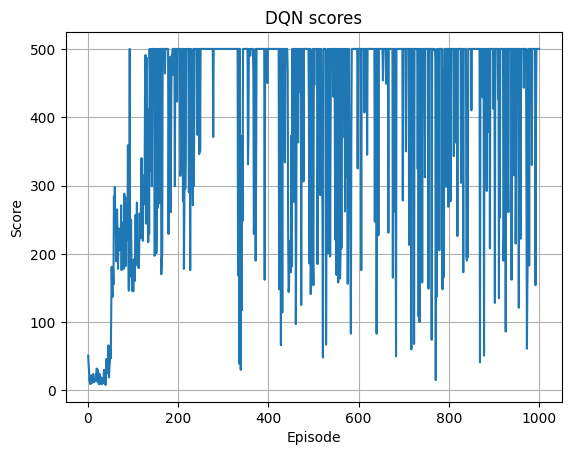

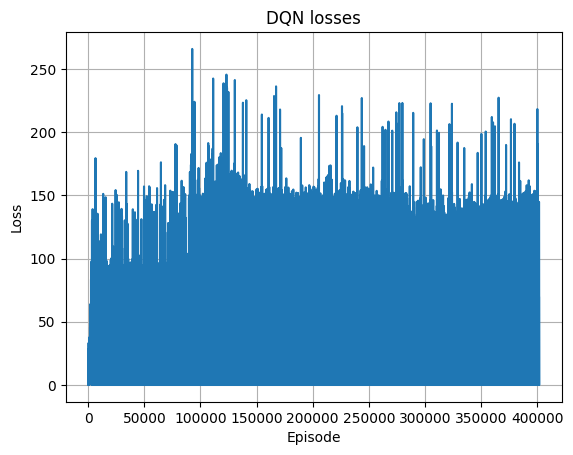

In [ ]:
# cartpole DQN train 
from DQN_agent import DQN
import gym

def main(): 
    # DQN agent constant / hyperparameter
    RANDOM_SEED=112
    RHO=0.9 
    LAMDA=0.99
    EPSILON=0.9
    EPSILON_DECAY=0.999
    EPSILON_MIN=0.01
    BATCH_SIZE=64
    REPLY_MEMORY_SIZE=100_000
    N_EPISODE=1000
    SAMPLE_RATE=1
    TEMP_FOLDER='./temp/'
    MODEL_FOLDER='./model/cartpole/'

    # gym enviroment const / hyperparameter
    ENV_NAME='CartPole-v1'
    RENDER_MODE='rgb_array'
    ENV_MAX_EPISODE_STEPS = 1000

    # make & set gym enviroment
    env=gym.make(ENV_NAME,render_mode=RENDER_MODE)
    # env._max_episode_steps = ENV_MAX_EPISODE_STEPS 

    # make Gym Enviroment
    gym_env = Gym_Enviroment(env=env, seed=RANDOM_SEED, rho=RHO, lamda=LAMDA, 
                             epsilon=EPSILON, epsilon_decay=EPSILON_DECAY, epsilon_min=EPSILON_MIN, batch_size=BATCH_SIZE, 
                             reply_memory_size=REPLY_MEMORY_SIZE, n_episode=N_EPISODE, sample_rate=SAMPLE_RATE, 
                             temp_folder=TEMP_FOLDER,model_folder=MODEL_FOLDER)
    gym_env.train()
    gym_env.dqn.save_model(MODEL_FOLDER+'DQN.h5')
    gym_env.dqn.score_plot()
    env.close()

if __name__ == '__main__':
    main()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               768       
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 3)                 771       
                                                                 
Total params: 67,331
Trainable params: 67,331
Non-trainable params: 0
_________________________________________________________________
current episode:  100 | last 100 episode mean score:  200 | last 100 episode train time: 0:53:43 | total train time:  0:53:43 | loss mean 5.961 | loss 0.031
current episode:  200 | last 100 episode mean score:  199 | last 100 episode train time: 0:54:57 | total train time:  1:48:40 | loss mean 5.520 | loss 0.097
cu

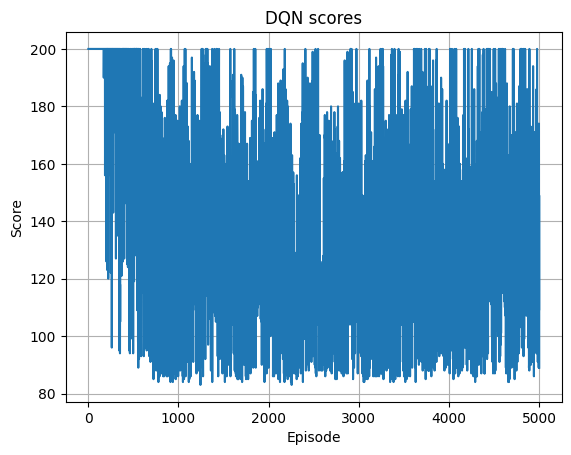

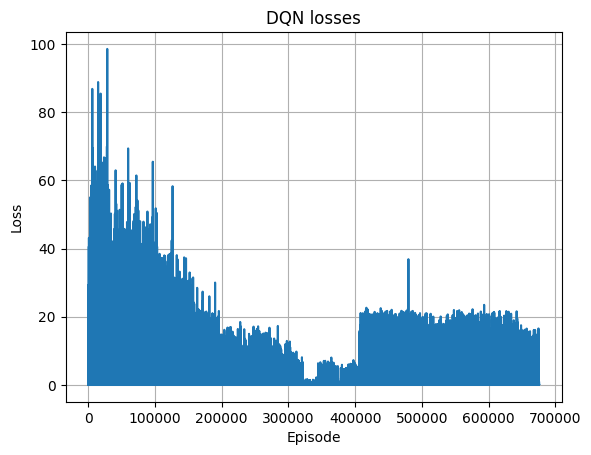

In [ ]:
# mountaincar DQN train 
from DQN_agent import DQN
import gym

def main(): 
    # DQN agent constant / hyperparameter
    RANDOM_SEED=112
    RHO=0.9 
    LAMDA=0.99
    EPSILON=0.9
    EPSILON_DECAY=0.999
    EPSILON_MIN=0.01
    BATCH_SIZE=64
    REPLY_MEMORY_SIZE=100_000
    N_EPISODE=2000
    SAMPLE_RATE=100
    TEMP_FOLDER='./temp/'
    MODEL_FOLDER='./model/mountaincar/'

    # gym enviroment const / hyperparameter
    ENV_NAME='MountainCar-v0'
    RENDER_MODE='rgb_array'
    ENV_MAX_EPISODE_STEPS = 1000

    # make & set gym enviroment
    env=gym.make(ENV_NAME,render_mode=RENDER_MODE)
    # env._max_episode_steps = ENV_MAX_EPISODE_STEPS 

    # make Gym Enviroment
    gym_env = Gym_Enviroment(env=env, seed=RANDOM_SEED, rho=RHO, lamda=LAMDA, 
                             epsilon=EPSILON, epsilon_decay=EPSILON_DECAY, epsilon_min=EPSILON_MIN, batch_size=BATCH_SIZE, 
                             reply_memory_size=REPLY_MEMORY_SIZE, n_episode=N_EPISODE, sample_rate=SAMPLE_RATE, 
                             temp_folder=TEMP_FOLDER,model_folder=MODEL_FOLDER)
    gym_env.train()
    gym_env.dqn.save_model(MODEL_FOLDER+'DQN.h5')
    gym_env.dqn.score_plot()
    env.close()

if __name__ == '__main__':
    main()